In [1]:
#Pulls from dataset "imdb_top_1000.csv" and converts it into a dataframe
#This is a dataset of 1000 IMDB.com's movies and statistics pertaining to each
#We import pandas for our use of dataframes
#The creation of the class colour will be referenced in instances where we need to call upon difference CSS colours in 
#order to better convey our analysis

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

class colour:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

IMDB = pd.read_csv("imdb_top_1000.csv",index_col = 0)
IMDB

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Poster_Link,,,,,,,,,,,,,,,
"https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg",The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
"https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
"https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg",The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
"https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
"https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg",12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"https://m.media-amazon.com/images/M/MV5BNGEwMTRmZTQtMDY4Ni00MTliLTk5ZmMtOWMxYWMyMTllMDg0L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg",Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
"https://m.media-amazon.com/images/M/MV5BODk3YjdjZTItOGVhYi00Mjc2LTgzMDAtMThmYTVkNTBlMWVkXkEyXkFqcGdeQXVyNDY2MTk1ODk@._V1_UX67_CR0,0,67,98_AL_.jpg",Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
"https://m.media-amazon.com/images/M/MV5BM2U3YzkxNGMtYWE0YS00ODk0LTk1ZGEtNjk3ZTE0MTk4MzJjXkEyXkFqcGdeQXVyNDk0MDg4NDk@._V1_UX67_CR0,0,67,98_AL_.jpg",From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0


In [2]:
#View of the dataframe

print(IMDB.head())

                                                                Series_Title  \
Poster_Link                                                                    
https://m.media-amazon.com/images/M/MV5BMDFkYTc...  The Shawshank Redemption   
https://m.media-amazon.com/images/M/MV5BM2MyNjY...             The Godfather   
https://m.media-amazon.com/images/M/MV5BMTMxNTM...           The Dark Knight   
https://m.media-amazon.com/images/M/MV5BMWMwMGQ...    The Godfather: Part II   
https://m.media-amazon.com/images/M/MV5BMWU4N2F...              12 Angry Men   

                                                   Released_Year Certificate  \
Poster_Link                                                                    
https://m.media-amazon.com/images/M/MV5BMDFkYTc...          1994           A   
https://m.media-amazon.com/images/M/MV5BM2MyNjY...          1972           A   
https://m.media-amazon.com/images/M/MV5BMTMxNTM...          2008          UA   
https://m.media-amazon.com/images/M/MV5

In [3]:
#Count of rows and columns

print(IMDB.shape)

(1000, 15)


In [4]:
#Checking if there are any data gaps

missing_values_count = IMDB.isnull().sum()
print(missing_values_count[0:11])


Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
dtype: int64


In [5]:
#Data Cleaning
#Drop any rows that are duplicates

drop_duplicates= IMDB.drop_duplicates()
print(IMDB.shape,drop_duplicates.shape)

(1000, 15) (1000, 15)


In [6]:

#Making a duplicate of the IMDB dataframe using the copy function in order to still keep the original 
#also be able to alter IMDBdb without fear of any data loss


IMDBdb = IMDB.copy()
print(IMDBdb)

                                                                Series_Title  \
Poster_Link                                                                    
https://m.media-amazon.com/images/M/MV5BMDFkYTc...  The Shawshank Redemption   
https://m.media-amazon.com/images/M/MV5BM2MyNjY...             The Godfather   
https://m.media-amazon.com/images/M/MV5BMTMxNTM...           The Dark Knight   
https://m.media-amazon.com/images/M/MV5BMWMwMGQ...    The Godfather: Part II   
https://m.media-amazon.com/images/M/MV5BMWU4N2F...              12 Angry Men   
...                                                                      ...   
https://m.media-amazon.com/images/M/MV5BNGEwMTR...    Breakfast at Tiffany's   
https://m.media-amazon.com/images/M/MV5BODk3Yjd...                     Giant   
https://m.media-amazon.com/images/M/MV5BM2U3Yzk...     From Here to Eternity   
https://m.media-amazon.com/images/M/MV5BZTBmMjU...                  Lifeboat   
https://m.media-amazon.com/images/M/MV5B

In [7]:
#Simple way of pulling the first 20 movies out of the dataframe

result = IMDBdb.head(20)
print("First 20 movies of the DataFrame:")
print(result)

First 20 movies of the DataFrame:
                                                                                         Series_Title  \
Poster_Link                                                                                             
https://m.media-amazon.com/images/M/MV5BMDFkYTc...                           The Shawshank Redemption   
https://m.media-amazon.com/images/M/MV5BM2MyNjY...                                      The Godfather   
https://m.media-amazon.com/images/M/MV5BMTMxNTM...                                    The Dark Knight   
https://m.media-amazon.com/images/M/MV5BMWMwMGQ...                             The Godfather: Part II   
https://m.media-amazon.com/images/M/MV5BMWU4N2F...                                       12 Angry Men   
https://m.media-amazon.com/images/M/MV5BNzA5ZDN...      The Lord of the Rings: The Return of the King   
https://m.media-amazon.com/images/M/MV5BNGNhMDI...                                       Pulp Fiction   
https://m.media-amazo

In [8]:
#Selecting by position
#Select single value by row & column

IMDBdb.iloc[[7],[7]] 

,Meta_score
Poster_Link,
"https://m.media-amazon.com/images/M/MV5BNDE4OTMxMTctNmRhYy00NWE2LTg3YzItYTk3M2UwOTU5Njg4XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_UX67_CR0,0,67,98_AL_.jpg",94.0


In [9]:
#Selecting by Label & Position
#The below code gives a list of all the teams in each season of the dataframe.

IMDBdb.iloc[:, 1]

Poster_Link
https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg                    1994
https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg                    1972
https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg                                                    2008
https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg                    1974
https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg                    1957
                                                                                                                                          

In [10]:
#A view of every movie that achieved a Metacritic score over 90.
#This method of selecting is a form of Boolean Indexing

IMDBdb[IMDBdb['Meta_score']>90]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Poster_Link,,,,,,,,,,,,,,,
"https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
"https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg",12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
"https://m.media-amazon.com/images/M/MV5BNzA5ZDNlZWMtM2NhNS00NDJjLTk4NDItYTRmY2EwMWZlMTY3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX67_CR0,0,67,98_AL_.jpg",The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
"https://m.media-amazon.com/images/M/MV5BNGNhMDIzZTUtNTBlZi00MTRlLWFjM2ItYzViMjE3YzI5MjljXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR0,0,67,98_AL_.jpg",Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
"https://m.media-amazon.com/images/M/MV5BNDE4OTMxMTctNmRhYy00NWE2LTg3YzItYTk3M2UwOTU5Njg4XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_UX67_CR0,0,67,98_AL_.jpg",Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"https://m.media-amazon.com/images/M/MV5BMjAxMTI1Njk3OF5BMl5BanBnXkFtZTgwNjkzODk4NTE@._V1_UX67_CR0,0,67,98_AL_.jpg",Fantasia,1940,G,125 min,"Animation, Family, Fantasy",7.7,A collection of animated interpretations of gr...,96.0,James Algar,Samuel Armstrong,Ford Beebe Jr.,Norman Ferguson,David Hand,88662,76408097.0
"https://m.media-amazon.com/images/M/MV5BMjg4ZmY1MmItMjFjOS00ZTg2LWJjNDYtNDM2YmM2NzhiNmZhXkEyXkFqcGdeQXVyNTAzMTY4MDA@._V1_UX67_CR0,0,67,98_AL_.jpg",The Florida Project,2017,A,111 min,Drama,7.6,"Set over one summer, the film follows precocio...",92.0,Sean Baker,Brooklynn Prince,Bria Vinaite,Willem Dafoe,Christopher Rivera,95181,5904366.0
"https://m.media-amazon.com/images/M/MV5BYTYxZjQ2YTktNmVkMC00ZTY4LThkZmItMDc4MTJiYjVhZjM0L2ltYWdlXkEyXkFqcGdeQXVyMjgyNjk3MzE@._V1_UY98_CR1,0,67,98_AL_.jpg",Leviafan,2014,R,140 min,"Crime, Drama",7.6,"In a Russian coastal town, Kolya is forced to ...",92.0,Andrey Zvyagintsev,Aleksey Serebryakov,Elena Lyadova,Roman Madyanov,Vladimir Vdovichenkov,49397,1092800.0


In [11]:
# This returns the mean of values
# Here we use the mean function to find out the mean of the Points and Goals against columns 

IMDB_Average_Rating = IMDBdb[["IMDB_Rating"]].mean().astype(int)

avgRating = IMDB_Average_Rating

print("The average IMDB rating of all movies is:", IMDB_Average_Rating)

The average IMDB rating of all movies is: IMDB_Rating    7
dtype: int32


In [12]:
# Here we are using the median function to compare the difference between the results for mean and median

IMDBdb[["No_of_Votes","IMDB_Rating"]].median()

No_of_Votes    138548.5
IMDB_Rating         7.9
dtype: float64

In [13]:


#Below we use Boolean indexing and the sum function to determine how much money Quentin Tarantino has grossed in his career.

QuentinTarantinoGross = IMDBdb.loc[IMDBdb['Director'] == 'Quentin Tarantino','Gross' ].sum()
print("Quentin Tarantino has grossed in his career:",QuentinTarantinoGross,"usd")

Quentin Tarantino has grossed in his career: 727034316.0 usd


In [14]:
#Below we use Boolean indexing and the sum function to determine how much Alfred Hitchcock has grossed in his best performing and worst performing movies.
Directormin = IMDBdb.loc[IMDBdb['Director'] == 'Alfred Hitchcock', 'Gross'].min()
Directormax = IMDBdb.loc[IMDBdb['Director'] == 'Alfred Hitchcock', 'Gross'].max()
print("Alfred Hitchcock's " +colour.BOLD+colour.UNDERLINE+colour.RED+"lowest"+colour.END+ " grossing movie:",Directormin,"usd box office")
print("Alfred Hitchcock's " +colour.BOLD+colour.UNDERLINE+colour.GREEN+"highest"+colour.END+ " grossing movie:",Directormax,"usd box office")

Alfred Hitchcock's lowest grossing movie: 12562.0 usd box office
Alfred Hitchcock's highest grossing movie: 36764313.0 usd box office


In [15]:
IMDBdb.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,7.949300,77.971530,2.736929e+05,6.803475e+07
std,0.275491,12.376099,3.273727e+05,1.097500e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,8.100000,87.000000,3.741612e+05,8.075089e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [16]:
#In order to alter the link column (which is set to index on default) then we must use the .reset_index() function.
#This will create a new index column called 'index' and number each row sequentially to the length of the dataframe.
#This will make Season now column 0

IMDBdb.reset_index(inplace=True)

In [17]:


print(IMDBdb)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II  

In [18]:
#Using the .groupby() function we can get the mean of each teams data over the 22 years and present it consisely

Director_Grouped = IMDBdb.groupby(["Director"]).mean()
Director_Grouped

,IMDB_Rating,Meta_score,No_of_Votes,Gross
Director,,,,
Aamir Khan,8.40,NaN,168895.0,1223869.0
Aaron Sorkin,7.80,77.0,89896.0,NaN
Abdellatif Kechiche,7.70,89.0,138741.0,2199675.0
Abhishek Chaubey,7.80,NaN,27175.0,NaN
Abhishek Kapoor,7.70,40.0,32628.0,1122527.0
...,...,...,...,...
Zack Snyder,7.60,54.0,616837.5,159062369.0
Zaza Urushadze,8.20,73.0,40382.0,144501.0
Zoya Akhtar,8.05,65.0,49906.5,4337509.5


In [19]:
#View using grouping and sorting to see which director had the best IMDB rating and number of votes average overall

Director_Grouped.sort_values(
     by=["IMDB_Rating", "No_of_Votes"],
     ascending=False
 )[["IMDB_Rating", "No_of_Votes"]]


,IMDB_Rating,No_of_Votes
Director,,
Frank Darabont,8.95,1745452.0
Lana Wachowski,8.70,1676426.0
Irvin Kershner,8.70,1159315.0
George Lucas,8.60,1231473.0
Fernando Meirelles,8.60,699256.0
...,...,...
Deniz Gamze Ergüven,7.60,35785.0
George Stevens,7.60,34075.0
Martin Rosen,7.60,33656.0


In [20]:
#The below code sorts teams in descending order with the priority of columns being metascore then imdb rating then number of votes.

Director_Grouped.sort_values(
     by=["Meta_score","IMDB_Rating", "No_of_Votes"],
     ascending=False
 )[["Meta_score","IMDB_Rating", "No_of_Votes"]]

,Meta_score,IMDB_Rating,No_of_Votes
Director,,,
Orson Welles,99.5,8.15,250891.0
Charles Laughton,99.0,8.00,81980.0
Michael Curtiz,98.5,8.20,284634.0
Fritz Lang,98.0,8.30,151713.0
Guillermo del Toro,98.0,8.20,618623.0
...,...,...,...
Bob Gale,NaN,7.70,29999.0
Shûsuke Kaneko,NaN,7.70,28630.0
Charles Vidor,NaN,7.70,27991.0


In [21]:
#importing a netflix titles database

Netflix = pd.read_csv("netflix_titles.csv",index_col = 0)

#View of the dataframe

print(Netflix.head())

            type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   

                                                      cast        country  \
show_id                                                                     
s1                                                     NaN  United States   
s2       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
s3       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
s4                                                     NaN            NaN   
s5       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

                 date_added  release_ye

In [22]:
# Find the common values in the 'title' & 'Series_Title' column
common_values = set(Netflix['title']).intersection(IMDBdb['Series_Title'])

# Filter the dataframes based on the common values
filtered_Netflix = Netflix[Netflix['title'].isin(common_values)]
filtered_IMDBdb = IMDBdb[IMDBdb['Series_Title'].isin(common_values)]

# Perform the merge based on the common values
merged_df = pd.merge(filtered_Netflix, filtered_IMDBdb, left_on='title', right_on='Series_Title')

# Print the merged dataframe
print(merged_df)

      type                                title          director  \
0    Movie                                 Jaws  Steven Spielberg   
1    Movie                         Training Day     Antoine Fuqua   
2    Movie                   Do the Right Thing         Spike Lee   
3    Movie          Once Upon a Time in America      Sergio Leone   
4    Movie                           Wind River   Taylor Sheridan   
..     ...                                  ...               ...   
167  Movie                            True Grit    Henry Hathaway   
168  Movie                       V for Vendetta    James McTeigue   
169  Movie  Willy Wonka & the Chocolate Factory        Mel Stuart   
170  Movie                               Zodiac     David Fincher   
171  Movie                           Zombieland   Ruben Fleischer   

                                                  cast  \
0    Roy Scheider, Robert Shaw, Richard Dreyfuss, L...   
1    Denzel Washington, Ethan Hawke, Scott Glenn, T... 

In [23]:
# Custom function to search movies by genre, director, and rating range
def search_movies(director=None, min_rating=None, max_rating=None):
    criteria = pd.Series(True, index=merged_df.index)
    
    
    if director:
        criteria = criteria & (merged_df['director'] == director)
    
    if min_rating:
        criteria = criteria & (merged_df['IMDB_Rating'] >= min_rating)
    
    if max_rating:
        criteria = criteria & (merged_df['IMDB_Rating'] <= max_rating)
    
    searched_movies = merged_df[criteria]
    return searched_movies

# Call the custom function to search movies

director = 'Quentin Tarantino'
min_rating = 8.2
max_rating = None
searched_movies = search_movies(director=director, min_rating=min_rating, max_rating=max_rating)

# Print the selected columns for the searched movies
selected_columns = ['title', 'director','IMDB_Rating']
print(searched_movies[selected_columns])

                    title           director  IMDB_Rating
10       Django Unchained  Quentin Tarantino          8.4
124  Inglourious Basterds  Quentin Tarantino          8.3
135          Pulp Fiction  Quentin Tarantino          8.9


In [24]:
# Custom function to get top directors by movies
def get_top_directors_by_type(types, top_n=1):
    type_movies = merged_df[merged_df['type'] == types]
    top_directors = (
        type_movies.groupby('director')
        .agg({'IMDB_Rating': 'mean', 'title': 'count'})
        .rename(columns={'IMDB_Rating': 'Average Rating', 'title': 'Movie Count'})
        .sort_values(by='Average Rating', ascending=False)
        .head(top_n)
    )
    return top_directors

# Call the custom function to get top directors by genre
types = 'Movie'
top_directors = get_top_directors_by_type(types, top_n=6)

# Print the top directors of the specified genre
print(top_directors)


                                 Average Rating  Movie Count
director                                                    
Peter Jackson                               8.8            2
Christopher Nolan                           8.8            1
Lilly Wachowski, Lana Wachowski             8.7            1
Mysskin                                     8.5            1
Olivier Nakache, Éric Toledano              8.5            1
Tony Kaye                                   8.5            1


In [25]:
# Extract the 'Rating' column as a NumPy array
ratings = merged_df['IMDB_Rating'].to_numpy()
print("Ratings:", ratings)

# Calculate the average rating using NumPy
average_rating = np.mean(ratings)
print("Average Rating:", average_rating)

# Calculate the maximum rating using NumPy
max_rating = np.max(ratings)
print("Maximum Rating:", max_rating)

# Count the number of movies using NumPy
num_movies = np.size(ratings)
print("Number of Movies:", num_movies)

# Create a boolean mask for movies with rating above a threshold using NumPy
rating_threshold = 8.7
above_threshold_mask = ratings > rating_threshold

# Select and print only four columns from the filtered dataframe
selected_columns = ['title', 'listed_in', 'director','IMDB_Rating']
numpyied_df = merged_df[above_threshold_mask]
print(numpyied_df[selected_columns])



Ratings: [8.  7.7 8.  8.4 7.7 8.1 7.8 8.8 8.  7.7 8.4 7.9 7.6 7.9 7.8 7.7 7.7 7.7
 7.7 8.1 7.8 8.1 7.9 8.  8.4 8.1 8.4 7.8 8.5 7.6 8.  8.  7.9 8.2 8.5 8.1
 7.8 8.1 7.8 7.9 7.9 8.2 8.  7.8 8.  8.3 8.2 8.2 7.6 7.7 7.6 8.2 8.5 7.9
 7.6 8.  7.9 8.2 8.3 7.8 8.2 8.1 8.1 7.9 7.9 8.2 7.8 8.1 7.8 8.1 8.2 7.6
 8.3 7.7 7.7 8.2 8.1 8.2 8.  8.2 8.1 7.8 8.1 8.5 8.2 7.8 7.8 8.4 8.1 7.8
 7.7 7.6 8.3 8.1 8.3 8.5 7.6 7.7 8.4 7.7 7.7 7.6 7.8 8.  8.  8.1 7.7 7.7
 8.  7.9 8.  7.7 7.6 7.7 7.7 7.6 8.  7.7 8.1 7.6 8.  8.2 7.9 8.2 8.3 8.1
 8.  8.2 7.9 7.9 7.7 8.5 7.7 8.1 7.7 8.9 8.2 7.7 8.1 8.1 8.  8.9 7.6 8.
 8.  7.9 8.4 8.1 7.8 8.3 8.5 7.8 7.8 8.  7.6 8.  7.6 8.4 8.9 8.7 8.7 7.6
 8.  8.  7.7 7.9 8.1 7.6 8.2 7.8 7.7 7.6]
Average Rating: 7.995348837209303
Maximum Rating: 8.9
Number of Movies: 172
                                             title  \
7                                        Inception   
135                                   Pulp Fiction   
141                               Schindler's List   
1

In [26]:
# Extract pattern from 'Title' column using regex
pattern = r'(.*?)\s+List'
titles_with_pattern = merged_df[merged_df['title'].str.contains(pattern, flags= re.IGNORECASE)]

# Print the titles with the extracted pattern
print(titles_with_pattern['title'])

141    Schindler's List
Name: title, dtype: object


In [27]:
# Iterate over rows using iterrows()
print("Iterating over rows using iterrows():")
for index, row in merged_df.iterrows():
    print(colour.GREEN + colour.BOLD + colour.UNDERLINE 
              +row['title']+ colour.END,
          row['release_year'],
          row['listed_in'],
          row['director'],
          row['IMDB_Rating'])


Iterating over rows using iterrows():
Jaws 1975 Action & Adventure, Classic Movies, Dramas Steven Spielberg 8.0
Training Day 2001 Dramas, Thrillers Antoine Fuqua 7.7
Do the Right Thing 1989 Classic Movies, Comedies, Dramas Spike Lee 8.0
Once Upon a Time in America 1984 Classic Movies, Dramas Sergio Leone 8.4
Wind River 2017 Dramas, Independent Movies Taylor Sheridan 7.7
Catch Me If You Can 2002 Dramas Steven Spielberg 8.1
Ferris Bueller's Day Off 1986 Classic Movies, Comedies, Cult Movies John Hughes 7.8
Inception 2010 Action & Adventure, Sci-Fi & Fantasy, Thrillers Christopher Nolan 8.8
Magnolia 1999 Dramas, Independent Movies Paul Thomas Anderson 8.0
The Machinist 2004 Dramas, Independent Movies, Thrillers Brad Anderson 7.7
Django Unchained 2012 Action & Adventure, Dramas Quentin Tarantino 8.4
Boogie Nights 1997 Comedies, Dramas, Independent Movies Paul Thomas Anderson 7.9
Seven Pounds 2008 Dramas, Romantic Movies Gabriele Muccino 7.6
Star Trek 2009 Action & Adventure, Sci-Fi & Fanta

Short Term 12 2013 Dramas, Independent Movies Destin Daniel Cretton 8.0
Sling Blade 1996 Dramas, Independent Movies Billy Bob Thornton 8.0
Spartacus 2013 TV Action & Adventure, TV Dramas nan 7.9
Spider-Man: Into the Spider-Verse 2018 Action & Adventure, Comedies Peter Ramsey, Rodney Rothman, Bob Persichetti 8.4
Spotlight 2015 Dramas, Independent Movies Tom McCarthy 8.1
Taken 2018 Crime TV Shows, TV Action & Adventure, TV Thrillers nan 7.8
The Apartment 2014 International TV Shows, Reality TV nan 8.3
The Departed 2006 Dramas, Thrillers Martin Scorsese 8.5
The Fighter 2010 Dramas, Sports Movies David O. Russell 7.8
The Girl with the Dragon Tattoo 2011 Dramas, Thrillers David Fincher 7.8
The Help 2011 Dramas Tate Taylor 8.0
The Jungle Book 2010 Kids' TV nan 7.6
The King's Speech 2010 Dramas, International Movies Tom Hooper 8.0
The Little Mermaid 2018 Children & Family Movies, Dramas Blake Harris, Chris Bouchard 7.6
The Lives of Others 2006 Dramas, International Movies, Thrillers Florian H

In [28]:
# Create a dictionary from the dataframe
movies_dict = merged_df.to_dict('records')

# Print the dictionary
print(movies_dict)

[{'type': 'Movie', 'title': 'Jaws', 'director': 'Steven Spielberg', 'cast': 'Roy Scheider, Robert Shaw, Richard Dreyfuss, Lorraine Gary, Murray Hamilton, Carl Gottlieb, Jeffrey Kramer, Susan Backlinie, Jonathan Filley, Ted Grossman', 'country': 'United States', 'date_added': 'September 16, 2021', 'release_year': 1975, 'rating': 'PG', 'duration': '124 min', 'listed_in': 'Action & Adventure, Classic Movies, Dramas', 'description': 'When an insatiable great white shark terrorizes Amity Island, a police chief, an oceanographer and a grizzled shark hunter seek to destroy the beast.', 'Poster_Link': 'https://m.media-amazon.com/images/M/MV5BMmVmODY1MzEtYTMwZC00MzNhLWFkNDMtZjAwM2EwODUxZTA5XkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_UX67_CR0,0,67,98_AL_.jpg', 'Series_Title': 'Jaws', 'Released_Year': '1975', 'Certificate': 'A', 'Runtime': '124 min', 'Genre': 'Adventure, Thriller', 'IMDB_Rating': 8.0, 'Overview': "When a killer shark unleashes chaos on a beach community, it's up to a local sheriff, a marine

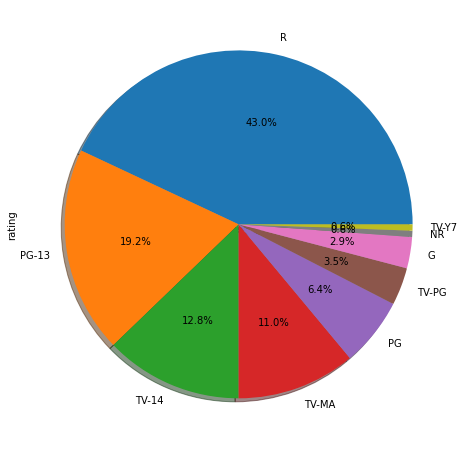

In [29]:
#a plot graph of the the tv ratings of the merged datafram of the top 1000 IMDB movies that are also on netflix

merged_df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

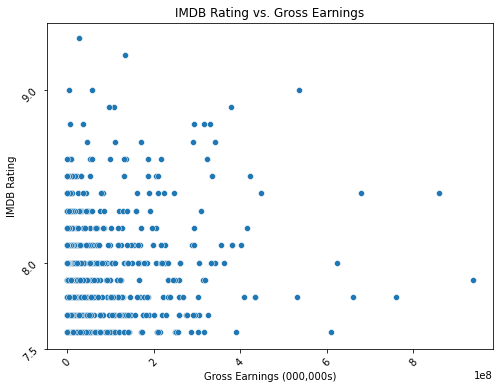

In [30]:
# Chart 2: Scatter plot of movie duration and gross earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(y='IMDB_Rating', x='Gross', data=IMDBdb)
plt.title('IMDB Rating vs. Gross Earnings')
plt.ylabel('IMDB Rating')
plt.xlabel('Gross Earnings (000,000s)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.yticks(ticks=[7.5,8, 9])
plt.show()

# Data Cleaning and Processing

Preprosseing the IMDB table to make it more suitable for future analysis


In [31]:
# Firstly starting the process we find that the certificate column has errors:
IMDB.Certificate.value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [32]:
#We insert new index
IMDB.reset_index(inplace=True)

In [33]:
#We drop a few datapoints to ease analysis

IMDB_Overview = IMDB[['Series_Title', 'Overview']]
IMDB = IMDB.drop(IMDB[['Poster_Link', 'Series_Title', 'Overview']], axis=1)
IMDB.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [34]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  1000 non-null   object 
 1   Certificate    899 non-null    object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [35]:
#By running this we discover that released year has an incorrect value at row 966, the type showing 'PG' instead of a year 
IMDB.Released_Year[list(map(str.isalpha, IMDB.Released_Year))]

966    PG
Name: Released_Year, dtype: object

In [36]:
#We can fix this using 
IMDB.Released_Year[IMDB.Released_Year == 'PG'] = 1995
IMDB.Released_Year = IMDB.Released_Year.astype('int')

In [37]:
# IMDB.Runtime = [x.replace(' min', '') for x in IMDB.Runtime]
# IMDB.Runtime = IMDB.Runtime.astype('int')
IMDB.Runtime = IMDB.Runtime.apply(lambda x: x.replace(' min', '')).astype('int')

In [38]:
#Altered runtime to remove the 'min'
IMDB.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


We are going to fix the Certificates column to be categorised into 3 values.

U - PG, G
UA - PG-13
A - NC-17,R


In [39]:
#We'll create a series of for loops that will categorise the certificate ratings into our 3 bands
certificate_mapping = {}

for i in 'G,PG,TV-Y,TV-Y7,TV-G,TV-PG'.split(','):
    certificate_mapping[i] = 'U'
for i in 'PG-13,TV-14'.split(','):
    certificate_mapping[i] = 'UA'
for i in 'R,NC-17,TV-MA'.split(','):
    certificate_mapping[i] = 'A'
    
IMDB.replace({'Certificate': certificate_mapping}, inplace=True)
IMDB.Certificate.value_counts()

A           344
U           286
UA          219
Passed       34
Approved     11
GP            2
16            1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [40]:
#Passed,Approved,GP,16,Unrated,U/A will also need to be dealt with

for i in ['Passed', 'Approved', '16', 'U/A']:
    certificate_mapping[i] = 'UA'

IMDB.Certificate[IMDB.Certificate == 'GP'] = 'PG'
IMDB.replace({'Certificate': certificate_mapping}, inplace=True)
IMDB.Certificate[IMDB.Certificate == 'Unrated'] = IMDB.Certificate.mode()
IMDB.Certificate.value_counts()

A     344
U     288
UA    266
Name: Certificate, dtype: int64

In [41]:
#After this we still have numerous missing values
IMDB.Certificate.isnull().sum()

102

To fill these we are going to have to find a reasoning, my reasoning being genres. My assumption is that films categorised as War, Horror or crime for example could be commonly categorised as mature (A), whilst movie genres such as Family, History or music could be categorised as universal (U) typically.

With this assumption in mind lets see if this is actually the case using other data (not missing certification) with our dataframe.

In [42]:
#First we must see how many unique genres appear and how many times they can be individually counted.

genres = []
for i in IMDB.Genre:
    j = i.split(', ')
    for n in range(len(j)):
        genres.append(j[n])
genres_unique = np.unique([genre for genre in genres])
genres_count = {genre: genres.count(genre) for genre in genres}

print(pd.DataFrame.from_dict(genres_count, orient='index', columns=['Freq']).sort_values('Freq', ascending=False))
print('-'*30)
print('Total number of genres is ', len(genres_unique))

           Freq
Drama       724
Comedy      233
Crime       209
Adventure   196
Action      189
Thriller    137
Romance     125
Biography   109
Mystery      99
Animation    82
Sci-Fi       67
Fantasy      66
History      56
Family       56
War          51
Music        35
Horror       32
Western      20
Film-Noir    19
Sport        19
Musical      17
------------------------------
Total number of genres is  21


In [43]:
#Now to check the frequecies of their certification types

genre_freq = pd.DataFrame(index=genres_unique, columns=['U', 'UA', 'A', 'Mode'])
for genre in genres_unique:
    genre_freq.loc[genre, ['U', 'UA', 'A']] = IMDB.Certificate[IMDB.Genre.map(lambda x: genre in x)].value_counts()[['U', 'UA', 'A']]
    genre_freq.loc[genre, ['Mode']] = IMDB.Certificate[IMDB.Genre.str.contains(genre)].mode()[0]
genre_freq

,U,UA,A,Mode
Action,36,81,58,UA
Adventure,96,63,30,U
Animation,66,10,4,U
Biography,35,33,39,A
Comedy,89,61,61,U
Crime,28,39,117,A
Drama,177,188,278,A
Family,46,5,2,U
Fantasy,29,16,16,U
Film-Noir,3,11,1,UA


Using our previously mentioned examples of War, Horror or crime and Family, History or music we see that our assumption is correct!

In [44]:
#Now to implement that logic for the missing 102 values

def cert_by_genre(genres):
    genres = list(genres.split(', '))
    lst = [genre_freq.loc[genre, 'Mode'] for genre in genres]
    return max(set(lst), key=lst.count)

IMDB.Certificate[IMDB.Certificate.isnull()] = IMDB.Genre[IMDB.Certificate.isnull()].apply(cert_by_genre)
IMDB.Certificate.isnull().sum()

0

In [45]:
#Convert Gross feature to millions and No_of_Votes to thousands.
IMDB.Gross = IMDB.Gross*10**-6
IMDB.No_of_Votes = IMDB.No_of_Votes*10**-3

In [46]:
#Convert certificate to numeric values
certificate_mapping = {'A': 0, 'UA': 1, 'U': 2}
IMDB.Certificate = IMDB.Certificate.map(certificate_mapping).astype('int')
IMDB.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,0,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343.110,28.341469
1,1972,0,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620.367,134.966411
2,2008,1,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303.232,534.858444
3,1974,0,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129.952,57.300000
4,1957,2,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689.845,4.360000


We need to simplify the Star1,Star2... columns into one to get a clearer read. To do this we must amalgamate the star columns into one sigular cast column. It's important to know that IMDB sort the stars by who is credited first in the end credits, therefor it isn't determined by popularity but importance to the film. To create this attribute, we are going to use the following logic: the higher the class cast of actors composing a starring group, more likely a movie will attract large audience and generate large revenues. The first instance of an actor appearance in the dataset is set to be 0. It will increment by 1 each subsequent appearance in chronological order, if any. 

We'll create a feature called Act_aprnc, which will reflect the sum of appearances of all four actors by series.



In [47]:
#First, we create a list of unique actors that are met in columns Star1 through to Star4.

actors = []
cols = ['Star1', 'Star2', 'Star3', 'Star4']
for col in cols:
    actors.append(IMDB[col].unique())
actors = np.unique([item for sublist in actors for item in sublist])
actors

array(['Aamir Bashir', 'Aamir Khan', 'Aaron Eckhart', ...,
       'Éric Toledano', 'Ömer Faruk Sorak', 'Özge Özberk'], dtype='<U27')

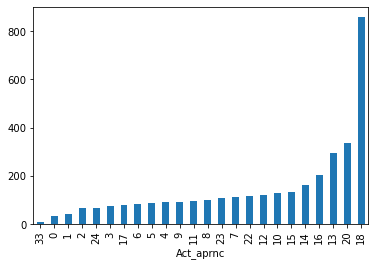

In [48]:
#Then, we estimate appearances for every actor, considering the year of series release, and sum them up. 
#We may drop features Star1, Star2, Star3 and Star4, thereafter.

IMDB['Act_aprnc'] = 0
for actor in actors:
    dummy = IMDB[['Star1', 'Star2', 'Star3', 'Star4']] == actor
    index = dummy[dummy.apply(lambda x: any(x), axis=1)].index.values
    index = IMDB.loc[index].sort_values('Released_Year').index.values
    aprnc = range(len(index))
    IMDB.loc[index, 'Act_aprnc'] = IMDB.loc[index, 'Act_aprnc'] + aprnc

IMDB.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis=1, inplace=True)
IMDB[['Gross', 'Act_aprnc']].groupby('Act_aprnc').mean().sort_values(by='Gross').plot.bar(legend=False);

Gross                                                           \
               count        mean         std       min        25%         50%   
Aprnc_bins                                                                      
Barely known   620.0   52.508041   94.808030  0.001305   1.892096   12.190750   
Up and Coming  127.0   94.551609  116.798944  0.085433  20.007773   46.889293   
Fan Fave        51.0  107.107886   93.870478  0.349555  23.191447   77.911774   
Famous          33.0  197.313210  209.602179  7.000000  56.671993  107.100855   

                                       
                      75%         max  
Aprnc_bins                             
Barely known    57.163567  936.662225  
Up and Coming  134.049215  659.325379  
Fan Fave       168.051046  309.125409  
Famous         335.451311  858.373000

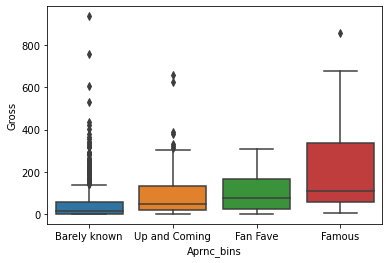

In [49]:
#Next,we are going to create appearance bands and check the correlation with Gross.
IMDB['Aprnc_bins'] = pd.cut(IMDB.Act_aprnc, 
                          [0,4,8,12,IMDB.Act_aprnc.max()+1], 
                          labels=['Barely known', 'Up and Coming', 'Fan Fave', 'Famous'],
                          include_lowest=True)

sns.boxplot(data=IMDB, x='Aprnc_bins', y='Gross')
IMDB[['Gross', 'Aprnc_bins']].groupby('Aprnc_bins').describe()

In [50]:
IMDB.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Act_aprnc,Aprnc_bins
0,1994,0,142,Drama,9.3,80.0,Frank Darabont,2343.110,28.341469,3,Barely known
1,1972,0,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620.367,134.966411,2,Barely known
2,2008,1,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303.232,534.858444,14,Famous
3,1974,0,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129.952,57.300000,3,Barely known
4,1957,2,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689.845,4.360000,2,Barely known


In conclusion,movies with less known actors tend to gather less cash, than those with a famous cast. 

In [51]:
#We are going to create cast class based on appearance bands 
#and remove Act_aprnc and Aprnc_bins from the dataset for cleaning purposes.

cast_class_mapping = {'Barely known': 0, 'Up and Coming': 1, 'Fan Fave': 2, 'Famous': 3}
IMDB['Cast_class'] = IMDB.Aprnc_bins.map(cast_class_mapping).astype('int')
IMDB.drop(['Act_aprnc', 'Aprnc_bins'], axis=1, inplace=True)
IMDB.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Cast_class
0,1994,0,142,Drama,9.3,80.0,Frank Darabont,2343.110,28.341469,0
1,1972,0,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620.367,134.966411,0
2,2008,1,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303.232,534.858444,3
3,1974,0,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129.952,57.300000,0
4,1957,2,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689.845,4.360000,0


In [52]:
#Since Director is similar lets repeat this process but for that column
IMDB['Dir_aprnc'] = 0
for director in IMDB.Director.unique():
    index = IMDB[IMDB.Director == director].sort_values('Released_Year').index.values
    aprnc = range(len(index))
    IMDB.loc[index, 'Dir_aprnc'] = aprnc
    

<AxesSubplot:xlabel='Dir_aprnc'>

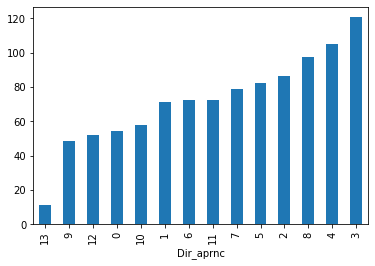

In [53]:
IMDB[['Gross', 'Dir_aprnc']].groupby('Dir_aprnc').mean().sort_values(by='Gross').plot.bar(legend=False)

Gross                                                          \
            count        mean         std       min        25%        50%   
Aprnc_bins                                                                  
Unknown     611.0   59.122159   90.809236  0.001305   2.459154  18.340051   
Seasoned     88.0   86.498356  144.676374  0.085433   4.360000  41.281556   
Vetern       45.0  120.788095  199.041885  0.019181   3.969893  33.080084   
Leading      87.0   84.665736  116.894460  0.012562  10.259930  42.438300   

                                    
                   75%         max  
Aprnc_bins                          
Unknown      74.193723  623.279547  
Seasoned     87.285945  936.662225  
Vetern      117.624028  858.373000  
Leading     127.761130  760.507625

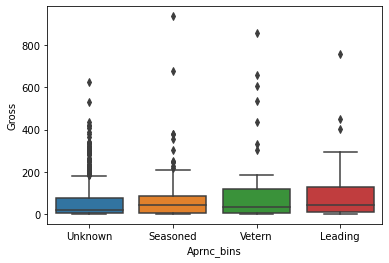

In [54]:
IMDB['Aprnc_bins'] = pd.cut(IMDB.Dir_aprnc, 
                          [0,1,2,3,IMDB.Dir_aprnc.max()+1],
                          labels=['Unknown', 'Seasoned', 'Vetern', 'Leading'],
                          include_lowest=True)

sns.boxplot(data=IMDB, x='Aprnc_bins', y='Gross')
IMDB[['Gross', 'Aprnc_bins']].groupby('Aprnc_bins').describe()

In [55]:
#Map the classes to number to simplify it for the algorithm
dir_class_mapping = {'Unknown': 0, 'Seasoned': 1, 'Vetern': 2, 'Leading': 3}
IMDB['Dir_class'] = IMDB.Aprnc_bins.map(dir_class_mapping).astype('int')
IMDB.drop(['Director', 'Dir_aprnc', 'Aprnc_bins'], axis=1, inplace=True)
IMDB.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Cast_class,Dir_class
0,1994,0,142,Drama,9.3,80.0,2343.110,28.341469,0,0
1,1972,0,175,"Crime, Drama",9.2,100.0,1620.367,134.966411,0,0
2,2008,1,152,"Action, Crime, Drama",9.0,84.0,2303.232,534.858444,3,2
3,1974,0,202,"Crime, Drama",9.0,90.0,1129.952,57.300000,0,0
4,1957,2,96,"Crime, Drama",9.0,96.0,689.845,4.360000,0,0


In [56]:
#Finally we see the list of column and decide which ones to feed into our algorithm
#
IMDB.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Cast_class,Dir_class
0,1994,0,142,Drama,9.3,80.0,2343.110,28.341469,0,0
1,1972,0,175,"Crime, Drama",9.2,100.0,1620.367,134.966411,0,0
2,2008,1,152,"Action, Crime, Drama",9.0,84.0,2303.232,534.858444,3,2
3,1974,0,202,"Crime, Drama",9.0,90.0,1129.952,57.300000,0,0
4,1957,2,96,"Crime, Drama",9.0,96.0,689.845,4.360000,0,0


In [57]:
#We won't be needing this
IMDB.drop(['Genre'], axis=1, inplace=True)


In [59]:
#We'll also drop any missing info for gross
IMDB.dropna(axis=0, inplace=True)
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 997
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  750 non-null    int32  
 1   Certificate    750 non-null    int32  
 2   Runtime        750 non-null    int32  
 3   IMDB_Rating    750 non-null    float64
 4   Meta_score     750 non-null    float64
 5   No_of_Votes    750 non-null    float64
 6   Gross          750 non-null    float64
 7   Cast_class     750 non-null    int32  
 8   Dir_class      750 non-null    int32  
dtypes: float64(4), int32(5)
memory usage: 43.9 KB


# Machine learning

Now lets train a model and predict the gross revenue. Since the Gross feature is continuous variable, models selection points on those, capable to perform a regression task. 

In [60]:
#We'll use random decision forests to identify relationship between the output and columns/attributes we've created .

X = IMDB.drop(['Gross'], axis=1)
Y = IMDB.Gross

X_train, X_test, Y_train, Y_true = train_test_split(X, Y, test_size=0.2)

In [61]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_true.values.ravel(), Y_pred)
mse = mean_squared_error(Y_true.values.ravel(), Y_pred)
r2 = r2_score(Y_true.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared:', round(r2, 2))
print('Training score: ', format(model.score(X_train, Y_train),'.2%'))
print('Testing score: ', format(model.score(X_test, Y_true.values.ravel()),'.2%'))

Mean Absolute Error: 45.73
Mean Squared Error: 6403.93
R-squared: 0.52
Training score:  93.69%
Testing score:  51.61%


In [62]:
features = X.columns.values
importances = model.feature_importances_
indices = importances.argsort()

features_dict={}
for i in indices:
    features_dict[features[i]] = importances[indices][i]

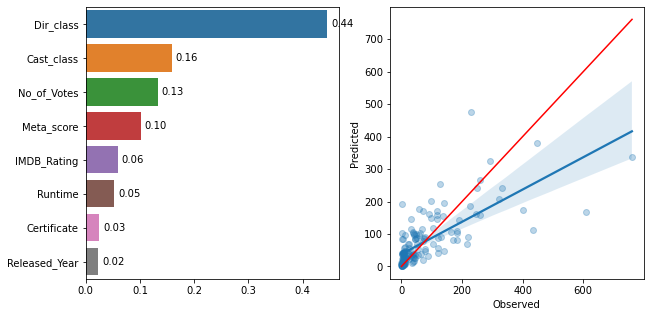

In [63]:
lst = sorted(features_dict.items(), key=lambda item: item[1], reverse=True)
x,y = zip(*lst)

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.barplot(x=list(y),y=list(x), ax=ax[0])

for p in ax[0].patches:
    h, w, y = p.get_height(), p.get_width(), p.get_y()
    ax[0].annotate(format(w, '.2f'), 
                (w, y+h/2.), 
                ha = 'center', va = 'center',
                xytext=(15,0),
                textcoords = 'offset points')
    
lim = round(max(max(Y_true), max(Y_pred)))
xlims=(0,lim)
ylims=(0,lim)
sns.regplot(x=Y_true, y=Y_pred, scatter_kws={'alpha':0.3}, ax=ax[1])
ax[1].plot(xlims, ylims, color='r');
ax[1].set(xlabel='Observed', ylabel='Predicted');